<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>MACHINE LEARNING</h1> </center> 
<center> <h1>ÁRBOL DE DECISIÓN</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# NOMBRE: EMMANUEL ZAPATA

<img src="https://user-images.githubusercontent.com/19308295/125208763-2758d800-e25a-11eb-87cf-6ca5db85c4ff.png" width="600" height="100" />

<div class="alert alert-info">

Los árboles de decisión funcionan al dividir el espacio de la característica en varias **regiones rectangulares simples**, divididas por **divisiones paralelas de ejes**. Para obtener una predicción para una observación particular, se utiliza la media o el modo de las respuestas de las observaciones de entrenamiento, dentro de la partición a la que pertenece la nueva observación.

</div>

## Librerías a utilizar

In [1]:
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd

## Importación de datos

El proyecto que vamos a desarrollar es de Conjunto de datos de plantas de iris, que se encuentra disponible en la librería scikit learn. 

Los datos esta almacenados en archivo `iris.csv` que se encuentra en el directorio `data`

In [2]:
#Importamos los datos de la misma librería de scikit-learn
dataset = pd.read_csv("data/iris.csv",
                      names = ["sepal length (cm)" , "sepal width (cm)", "petal length (cm)",
                                "petal width(cm)", "Etiqueta"])   

In [3]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width(cm),Etiqueta
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width(cm),Etiqueta
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


`ceros=setosa, unos=versicolor y dos=virginica`

## Exploración de datos

### Tamaño Dataframe

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width(cm)    150 non-null    float64
 4   Etiqueta           150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width(cm)      float64
Etiqueta               int64
dtype: object

In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width(cm)      150
Etiqueta             150
dtype: int64

In [9]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width(cm)      0
Etiqueta             0
dtype: int64

In [10]:
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width(cm)', 'Etiqueta'],
      dtype='object')

In [11]:
dataset.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width(cm),Etiqueta
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Preparación de los datos para Árboles de Decisión Clasificación 

Para este ejemplo vamos a implementar un clasificador Árboles de Decisión Clasificación, para este algoritmo se requiere todas las variables independientes, para nuestro caso serán las variables **Caracteristica**.

Ahora vamos a proceder a definir las variables de “X” y “y” que vamos emplear en nuestro modelo.

Para “X” vamos a utilizar todas las variables de caracteristicas, por lo que la igualamos a las primeras 4 columnas.

In [12]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width(cm),Etiqueta
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
#Seleccionamos todas las columnas de carasteristicas
X = dataset[dataset.columns[:-1]].to_numpy()

In [14]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Por su parte, “y” será igual a los datos correspondientes a “etiquetas” por lo que igualamos esta variable a la ultima columna.

In [15]:
#Defino los datos correspondientes a las etiquetas
y= dataset[dataset.columns[-1]].to_numpy()


In [16]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Recuerda que “y” cuenta con una sola columna con solamente ceros, unos y dos, corresponden a setosa, versicolor, y virginica respectivamente

## Implementación de Árboles de Decisión Clasificación

Definido “X” y “y” ya podemos realizar la separación correspondiente a los datos de prueba y entrenamiento para ello importamos la respectiva librería y procedemos a utilizar train_test_split para separar los datos.

In [17]:
from sklearn.model_selection import train_test_split

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [18]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

Seguidamente definimos el algoritmo, entonces decimos desde skelarn.tree importamos DecisionTreeClasiffier. Acá lo que indicamos es que desde el modulo de árboles de skelearn, vamos a importar el algoritmo de árboles de decisión clasificación, recuerda que ese algoritmo también funciona para problemas de regresión.

In [19]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion="entropy")


Ahora definimos el algoritmo y lo configuramos para crear el modelo y entrenarlo. En este caso el único parámetro que vamos a configurar es el referente a “criterion” que se refiere a la medida de selección. Por defecto este parámetro viene configurado con el índice Gini pero para nuestro ejercicio lo voy a cambiar por “entropy” o entropía en español. Para entender mejor esto te recomiendo que buques la información publicada sobre la librería scikit learn para este algoritmo.

Definido esto ahora entrenamos el algoritmo, utilizando la instrucción fit() junto con los datos de entrenamiento separados previamente.

In [20]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Verificación del modelo desarrollado

A llegado el momento de verificar que tan preciso es el modelo desarrollado para ello utilizamos modulo `score` de los Datos de Prueba.

In [21]:
precision = algoritmo.score(X_test, y_test)
print("Precisión del modelo Datos Pruebas:")
print(precision)


Precisión del modelo Datos Pruebas:
0.9333333333333333


El resultado de este calculo es de 0,966 un valor bastante aceptable.

Con esto podemos concluir que con este algoritmo también podemos obtener muy buenos resultados con este conjunto de datos. Ya queda de tu parte si deseas mejorarlo y ver si es posible obtener algo más preciso, para ello puedes modificar los datos de la configuración del algoritmo, por ejemplo cambiando la medida de selección.

In [22]:
precision2 = algoritmo.score(X_train, y_train)
print("Precision del modelo Datos Entrenamiento:")
print(precision2)


Precision del modelo Datos Entrenamiento:
1.0


**eso se llama SOBREAJUSTE**

## Gráficamos nuestro Árbol

Importamos Librerias para graficar

instalar `conda install -c anaconda graphviz`

instalar `conda install -c conda-forge python-graphviz`

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

Generamos archivo `.dot` que contiene la grafica 

In [24]:
export_graphviz(algoritmo, out_file="arbol.dot", class_names=("setosa" "versicolor" "virginica"),
                feature_names=("sepal length(cm)", "sepal width (cm)", "petal length(cm)", "petal width (cm)"),
                impurity = False, filled = True)

Creamos la gráfica

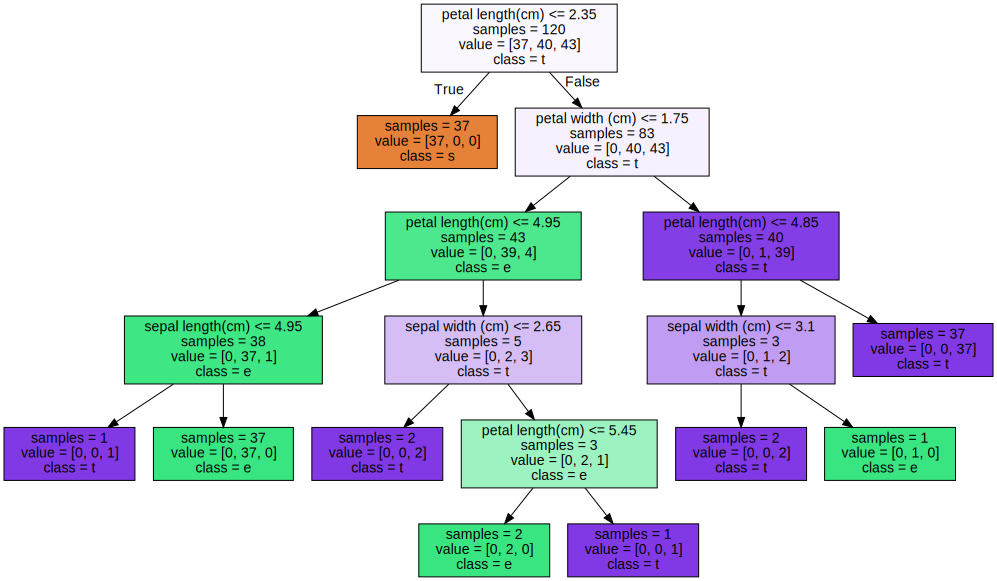

In [25]:
with open("arbol.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

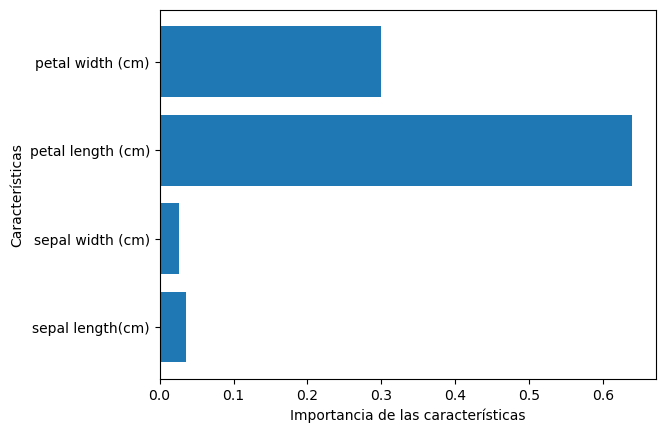

In [26]:
caract = X.shape[1]
plt.barh(range(caract), algoritmo.feature_importances_)
plt.yticks(np.arange(caract),("sepal length(cm)","sepal width (cm)", "petal length (cm)", "petal width (cm)"))
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()




## Volvemos a entrenar el modelo con 3 niveles evitando sobreajuste

In [27]:
#Arboles de decisión
algoritmo = DecisionTreeClassifier(max_depth=3)

In [28]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
precision = algoritmo.score(X_test, y_test)
print("Precisión del modelo Datos Prueba:")
print(precision)


Precisión del modelo Datos Prueba:
0.9666666666666667


In [30]:
precision2 = algoritmo.score(X_train, y_train)
print("Precisión del modelo Datos Entrenamiento:")
print(precision2)

Precisión del modelo Datos Entrenamiento:
0.975


In [31]:
export_graphviz(algoritmo, out_file='arbol.dot', class_names=('setosa', 'versicolor', 'virginica'),
                feature_names=('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'),
                impurity=False, filled=True)


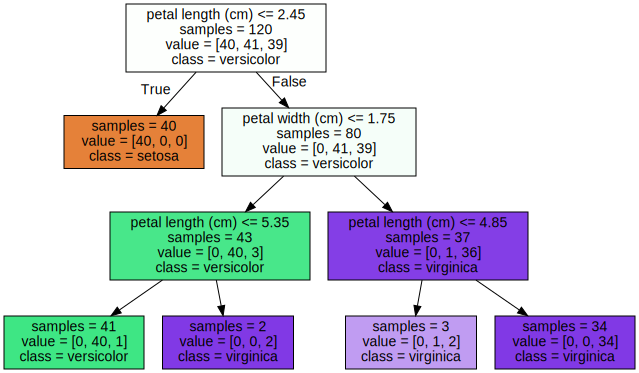

In [32]:
with open('arbol2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
